# Importing all necessary libraries 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [46]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import  sklearn.metrics as metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc,recall_score

# Importing the data bases

In [17]:
data_frame_1=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/firstname_with_sex.csv",sep=";")
data_frame_2=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/transcriptions_with_sex.csv",sep=",")

## I create a new data frame, that i call "data_frame_2_cleaned" where i keep only the first name and the sex.

In [18]:
data_frame_2_cleaned=data_frame_2[['sex']].copy()
data_frame_2['prediction'] = data_frame_2['prediction'].astype(str)

# Créez une nouvelle liste pour stocker les prénoms
first_names = []
surname_list = []
# Parcourez chaque observation dans la colonne 'prediction'
for prediction in data_frame_2['prediction']:
   
    first_name = prediction.split()[3]
    surname = prediction.split()[1]
    # Ajoutez le prénom à la liste
    first_names.append(first_name)
    surname_list.append(surname)


# Ajoutez la liste des prénoms comme une nouvelle colonne dans le dataframe
data_frame_2_cleaned['first_name'] = first_names
data_frame_2_cleaned['surname'] = surname_list

# Je supprime les observations ambigu
data_frame_2_cleaned = data_frame_2_cleaned[data_frame_2_cleaned['sex'] != 'ambigu']

In [19]:
data_frame_2_cleaned.head()

,sex,first_name,surname
0,femme,Marie,Chardon
1,homme,Louis,Lhopital
2,femme,Marie,Pyrin
3,femme,Marie,Lavocat
4,femme,Marguerite,Benne


In [20]:
data_frame_1.head()

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


## Data descriptive statistics

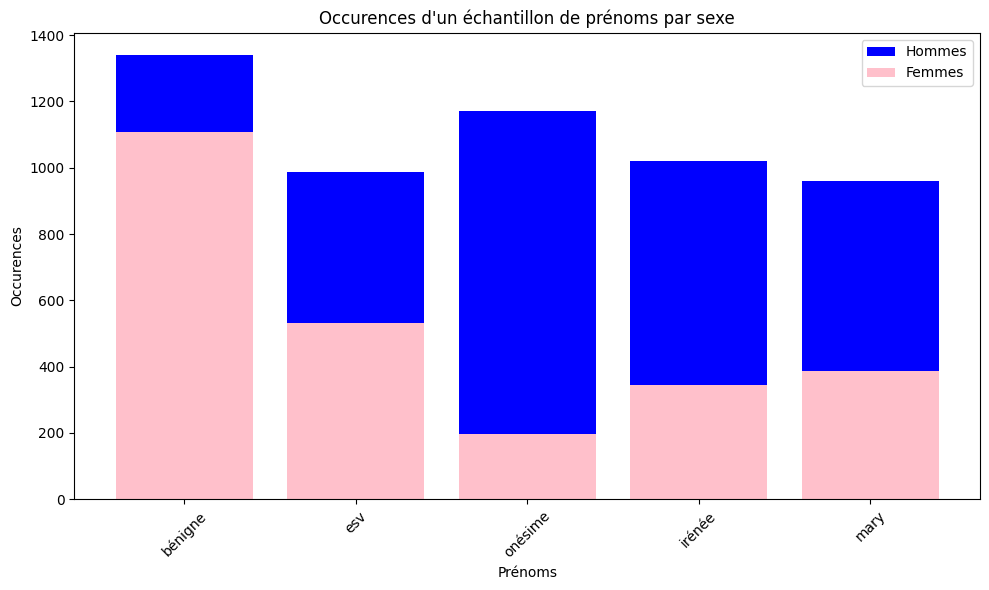

In [21]:
# Pour créer un histogramme montrant que la tâche de prédiciton de sexe peut-être compliquée,
# je crée cette fonction qui permet de selectionner les prénoms où l'occrence de celui-ci pour les hommes
# est proche de celle pour les femmes. 
def similar_occurrences(row):
    seuil = 1000  
    diff = abs(row['male'] - row['female'])
    return diff <= seuil

# J'applique ensuite  la fonction sur chaque ligne du dataframe et filtrer les observations similaires
observations_similaires = data_frame_1[data_frame_1.apply(similar_occurrences, axis=1)]
# Je selctionne les 5 première observations
top_5_prenoms = observations_similaires.head(5)

#Ensuite je crée mon histogramme

plt.figure(figsize=(10, 6))


plt.bar(top_5_prenoms['firstname'], top_5_prenoms['male'], color='blue', label='Hommes')


plt.bar(top_5_prenoms['firstname'], top_5_prenoms['female'], color='pink', label='Femmes')


plt.xlabel('Prénoms')
plt.ylabel('Occurences')
plt.title("Occurences d'un échantillon de prénoms par sexe")
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

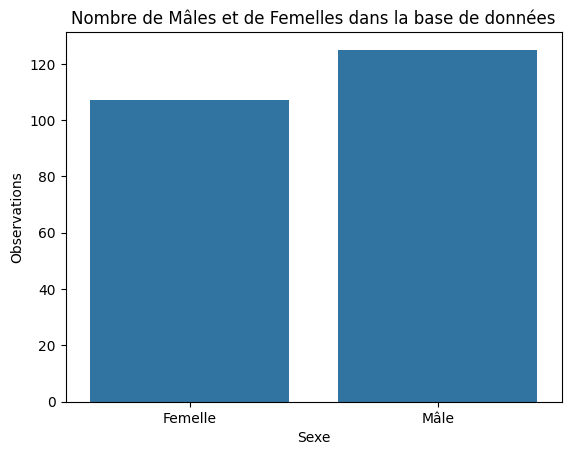

In [22]:
sns.countplot(x='sex', data=data_frame_2_cleaned)

# Définir les titres et les étiquettes des axes
plt.title('Nombre de Mâles et de Femelles dans la base de données')
plt.xlabel('Sexe')  # Changer le label de l'axe des x de "sex" à "sexe"
plt.ylabel('Observations')  # Changer le label de l'axe des y de "count" à "observations"

# Changer les étiquettes de l'axe des x
plt.xticks([0, 1], ['Femelle', 'Mâle'])

# Afficher le graphique
plt.show()

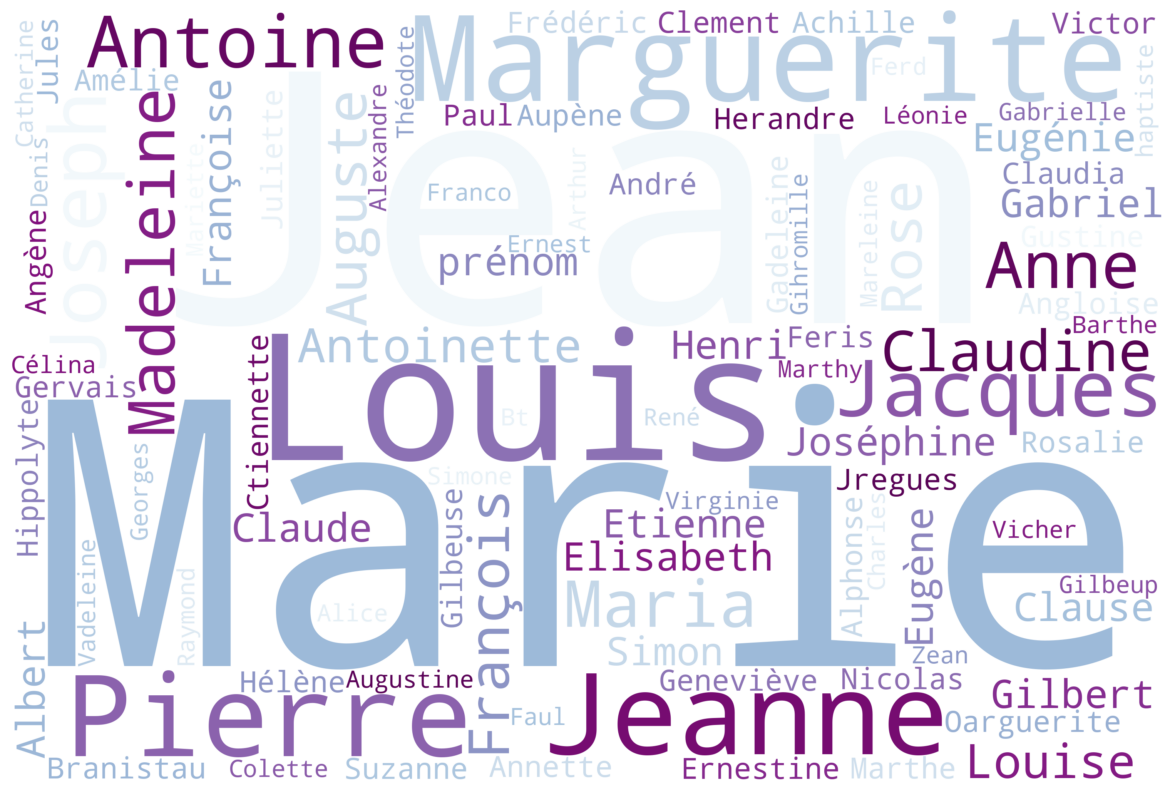

In [10]:

# Joining first names into a single string
text = " ".join(i for i in data_frame_2_cleaned.first_name)

# Creating WordCloud with Arial font
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="white",
    colormap="BuPu",
    collocations=False,  # specify the path to the Arial font file on your system
).generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#data_frame_2_cleaned['sex'] = data_frame_2_cleaned['sex'].replace({0:"homme",1:"femme"})


In [27]:
#data_frame_2_cleaned.head()

,sex,first_name,surname
0,femme,Marie,Chardon
1,homme,Louis,Lhopital
2,femme,Marie,Pyrin
3,femme,Marie,Lavocat
4,femme,Marguerite,Benne


{'A': 28, 'B': 3, 'C': 14, 'D': 1, 'E': 10, 'F': 10, 'G': 13, 'H': 5, 'I': 0, 'J': 49, 'K': 0, 'L': 14, 'M': 47, 'N': 1, 'O': 1, 'P': 9, 'Q': 0, 'R': 5, 'S': 4, 'T': 1, 'U': 0, 'V': 4, 'W': 0, 'X': 0, 'Y': 0, 'Z': 1}


Text(0.5, 1.0, 'Nombre de noms par première lettre')

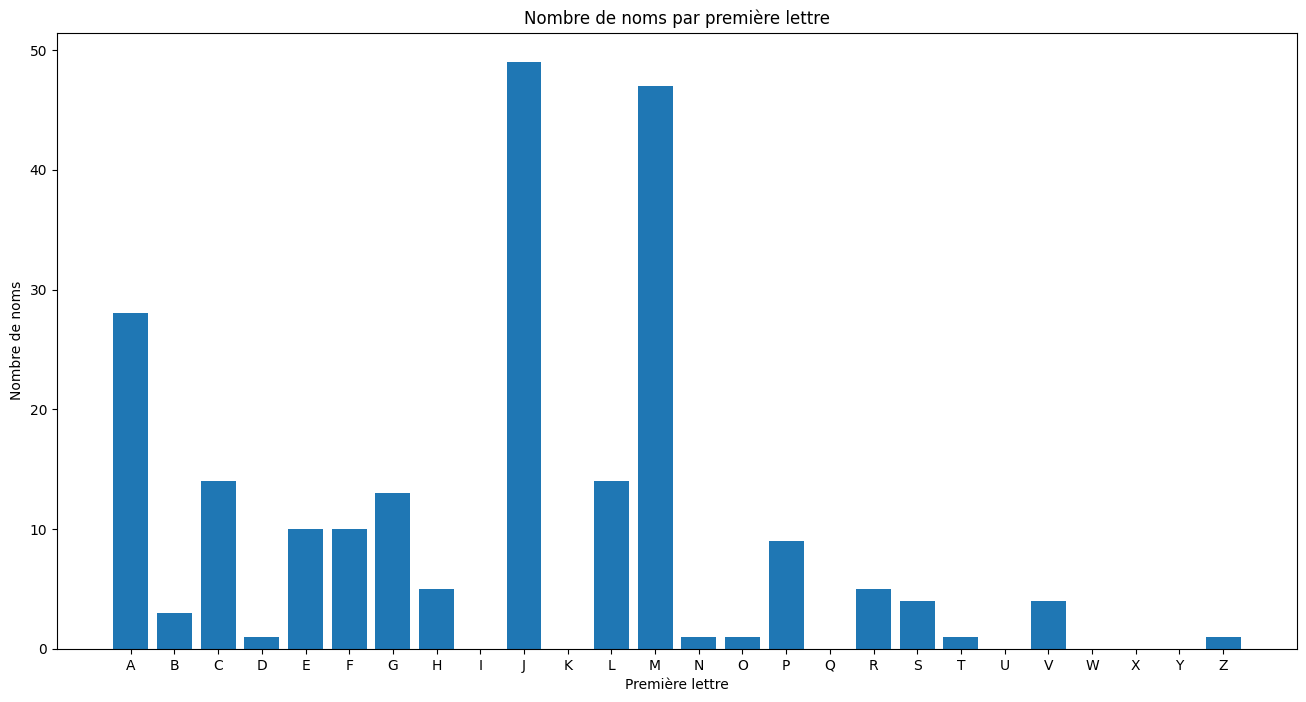

In [35]:
# Je compte d'abord le nombre d'occurence de chaque lettre en tant que première lettre d'un prénom dans le corpus. 
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(data_frame_2_cleaned[data_frame_2_cleaned['first_name'].str.startswith(i)])

print(startletter_count)

# Je plot la distribution des permières lettres

plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Première lettre')

plt.ylabel('Nombre de noms')

plt.title('Nombre de noms par première lettre')

# Preparing the data for experiments

In [36]:
# Comme variable explicative je prends la colonne 'first_name'. Et comme variable à expliquer 'sex'

X =list( data_frame_2_cleaned['first_name'])
Y = list(data_frame_2_cleaned['sex'])

In [37]:
# Je vectorise les données
encoder= LabelEncoder()
Y = encoder.fit_transform(Y)
cv=CountVectorizer(analyzer='char')
X=cv.fit_transform(X).toarray()

In [28]:
# Je divise mes données en 33% pour le test et 67% pour l'entrainement
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Models

In [40]:
# Cette fonction permet de mieux affichier la matrice de confusion

from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

## Logistic Regression

In [38]:
LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

LR_y_train=LR_model.predict(x_train)


### Performances

Précision sur les données d'entrainement : 0.8580645161290322
Précision sur les données de test : 0.8181818181818182
 Voici un résumé des performances de la régression logestique 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.82      0.86      0.84        43

    accuracy                           0.82        77
   macro avg       0.82      0.81      0.81        77
weighted avg       0.82      0.82      0.82        77

[[26  8]
 [ 6 37]]
None


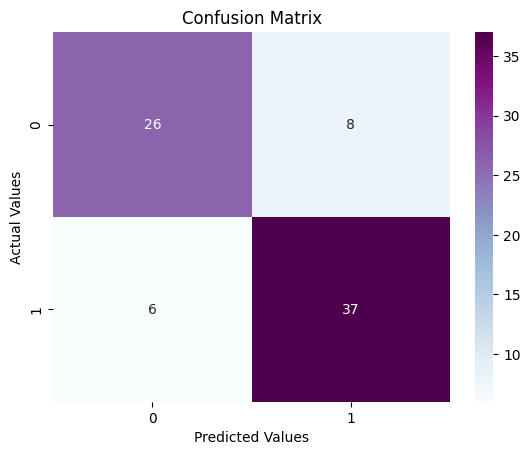

In [41]:
# Évaluation de la régrssion logéstique sur les données d'entrainement et ceux de test


print(f"Précision sur les données d'entrainement : {metrics.accuracy_score(LR_y_train,y_train)}")

print(f'Précision sur les données de test : {metrics.accuracy_score(LR_y_pred,y_test)}')

print(f" Voici un résumé des performances de la régression logestique \n {metrics.classification_report(y_test, LR_y_pred)}")

print(cmatrix(LR_model))

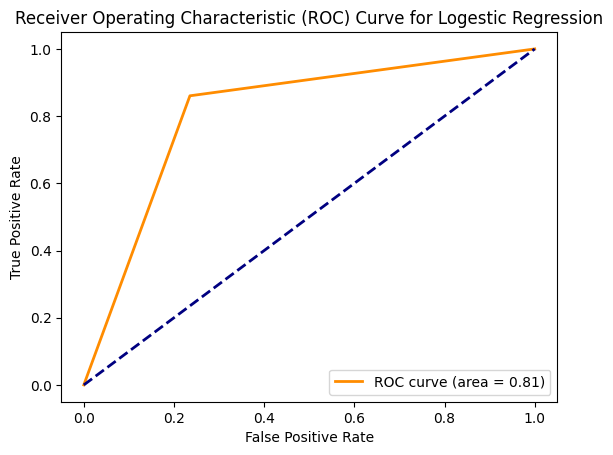

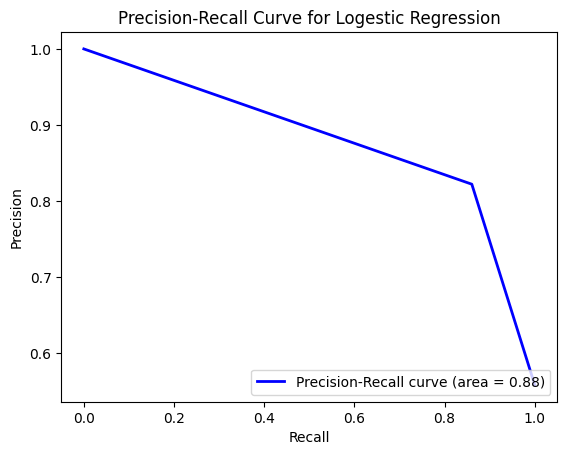

In [57]:
# Calculer les probabilités prédites pour les échantillons de test

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, LR_y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()


# Courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_test, LR_y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()


## Naive Bayes

In [55]:
NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

NB_y_train=NB_model.predict(x_train)


### Performances

Précision sur les données d'entrainement : 0.7612903225806451
Précision sur les données de test : 0.7142857142857143
 Voici un résumé des performances du modèle  Naive Baye  
               precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.72      0.79      0.76        43

    accuracy                           0.71        77
   macro avg       0.71      0.70      0.71        77
weighted avg       0.71      0.71      0.71        77

[[21 13]
 [ 9 34]]
None


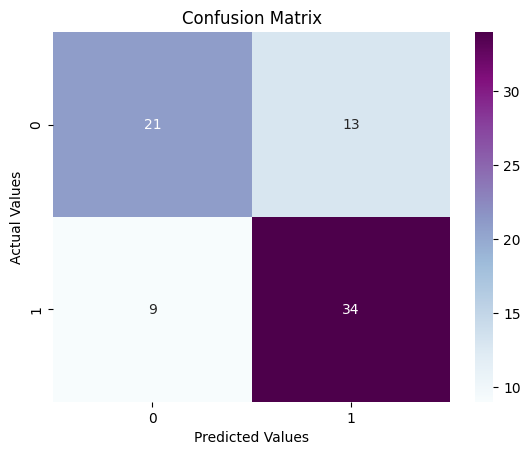

In [56]:
# Évaluation de l'algorithmes Naive Bayes sur les données d'entrainement et ceux de test
print(f"Précision sur les données d'entrainement : {metrics.accuracy_score(NB_y_train,y_train)}")

print(f'Précision sur les données de test : {metrics.accuracy_score(NB_y_pred,y_test)}')

print(f" Voici un résumé des performances du modèle  Naive Baye  \n {metrics.classification_report(y_test, NB_y_pred)}")

print(cmatrix(NB_model))

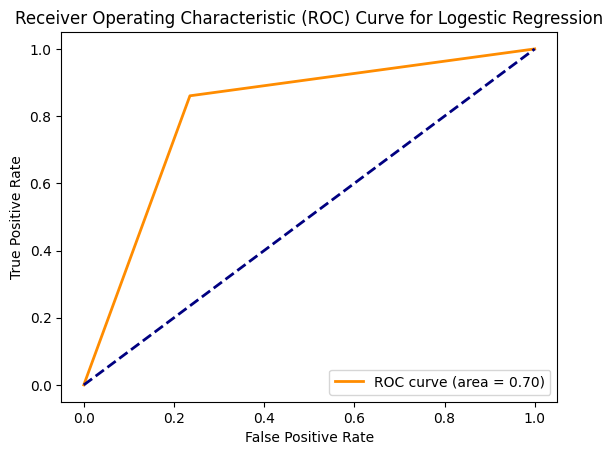

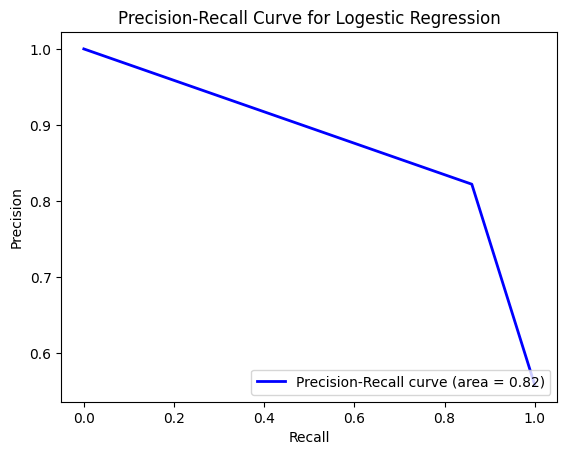

In [58]:
# Calculer les probabilités prédites pour les échantillons de test

# Courbe ROC
fpr_B, tpr_B, _ = roc_curve(y_test, NB_y_pred)
roc_auc_B = auc(fpr_B, tpr_B)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_B)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()


# Courbe de précision-rappel
precision_B, recall_B, _ = precision_recall_curve(y_test, NB_y_pred)
pr_auc_B = auc(recall_B, precision_B)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_B )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()


## XGBoost

In [59]:
XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(x_train,y_train)

XGB_y_pred = XGB_model.predict(x_test)

XGB_y_train=XGB_model.predict(x_train)

Précision sur les données d'entrainement : 0.9741935483870968
Précision sur les données de test : 0.8961038961038961
 Voici un résumé des performances de XGBoost 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.89      0.93      0.91        43

    accuracy                           0.90        77
   macro avg       0.90      0.89      0.89        77
weighted avg       0.90      0.90      0.90        77

[[29  5]
 [ 3 40]]
None


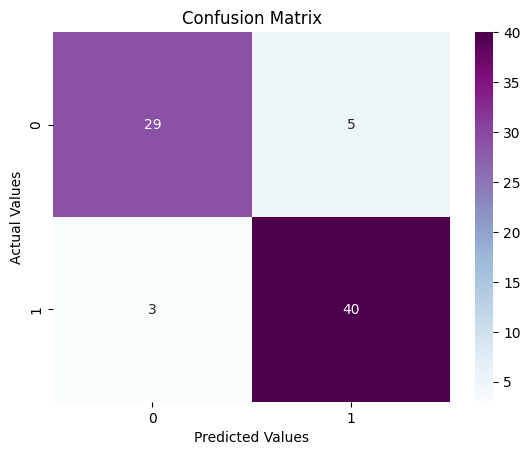

In [60]:
# Évaluation de l'algorithmes XGBoost sur les données d'entrainement et ceux de test
print(f"Précision sur les données d'entrainement : {metrics.accuracy_score(XGB_y_train,y_train)}")

print(f'Précision sur les données de test : {metrics.accuracy_score(XGB_y_pred,y_test)}')

print(f" Voici un résumé des performances de XGBoost \n {metrics.classification_report(y_test, XGB_y_pred)}")

print(cmatrix(XGB_model))

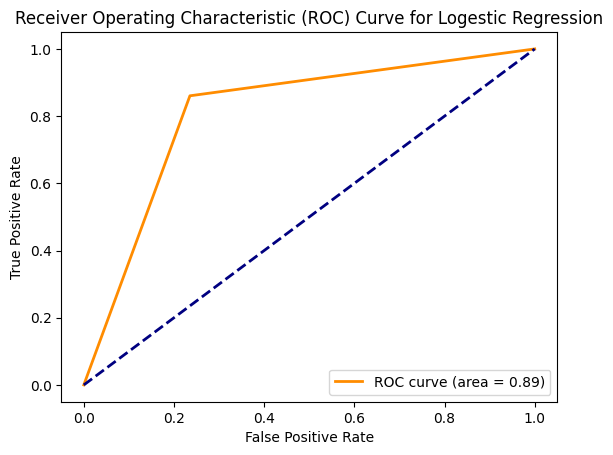

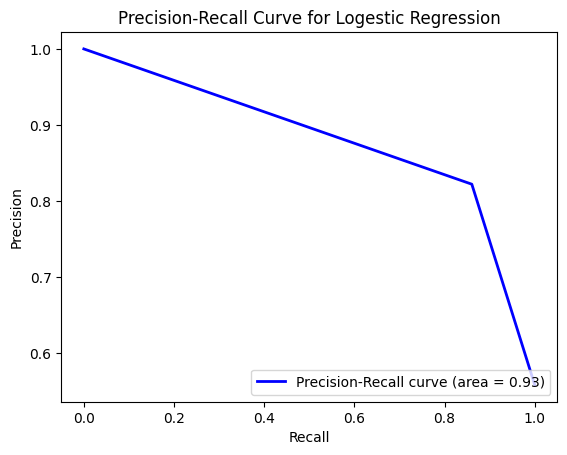

In [62]:
# Calculer les probabilités prédites pour les échantillons de test

# Courbe ROC
fpr_X, tpr_X, _ = roc_curve(y_test, XGB_y_pred)
roc_auc_X = auc(fpr_X, tpr_X)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_X)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()


# Courbe de précision-rappel
precision_X, recall_X, _ = precision_recall_curve(y_test, XGB_y_pred)
pr_auc_X = auc(recall_X, precision_X)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_X )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logestic Regression')
plt.legend(loc="lower right")
plt.show()
